In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from collections import Counter
# Charger le jeu de données
data_path ='C:/Users/ABDO/Desktop/bank-full.csv'
df = pd.read_csv(data_path,sep=';')
# Afficher les premières lignes du jeu de données pour avoir un aperçu
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.shape

(45211, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


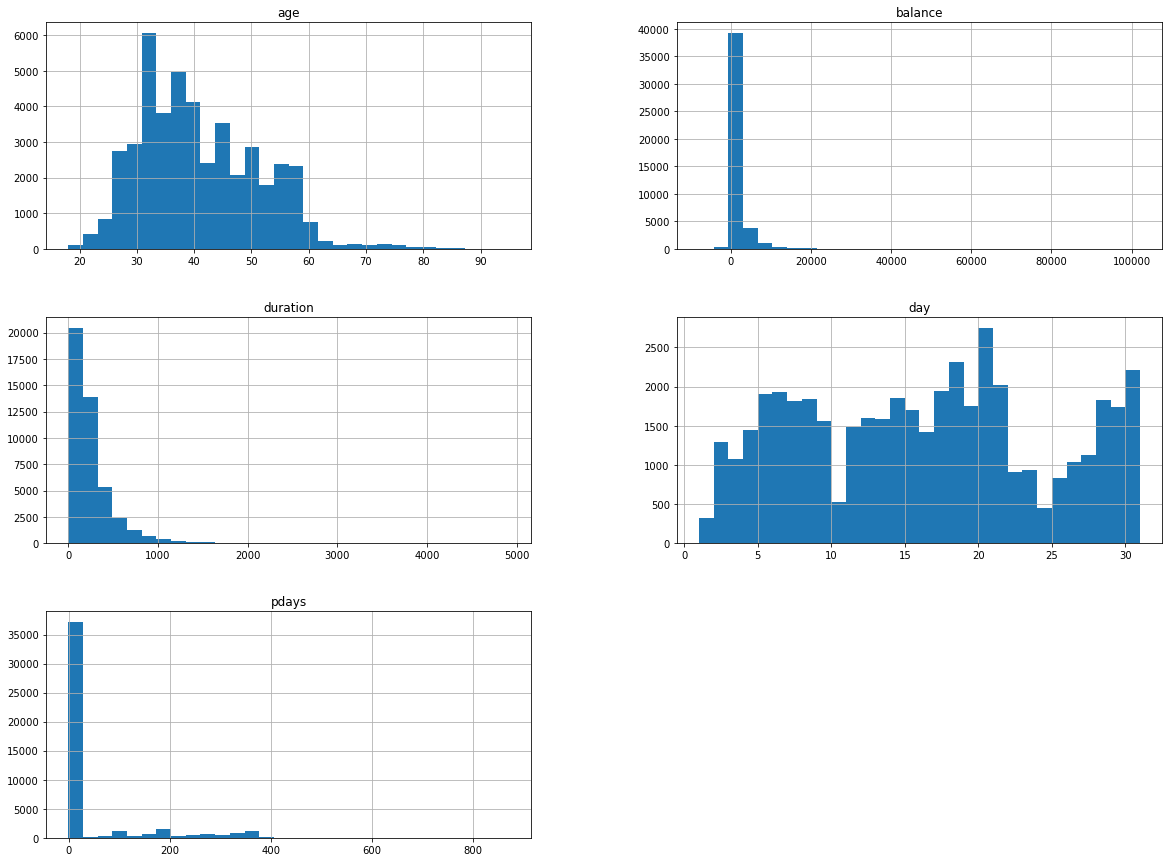

In [8]:
%matplotlib inline
df[['age','balance','duration','day','pdays']].hist(bins=30, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

In [15]:
category_features = df.select_dtypes(include=['object', 'bool']).columns.values

for col in category_features:
    print(col, "(", len(df[col].unique()) , "values):\n", np.sort(df[col].unique()))

job ( 12 values):
 ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
marital ( 3 values):
 ['divorced' 'married' 'single']
education ( 4 values):
 ['primary' 'secondary' 'tertiary' 'unknown']
default ( 2 values):
 ['no' 'yes']
housing ( 2 values):
 ['no' 'yes']
loan ( 2 values):
 ['no' 'yes']
contact ( 3 values):
 ['cellular' 'telephone' 'unknown']
month ( 12 values):
 ['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
poutcome ( 4 values):
 ['failure' 'other' 'success' 'unknown']
y ( 2 values):
 ['no' 'yes']


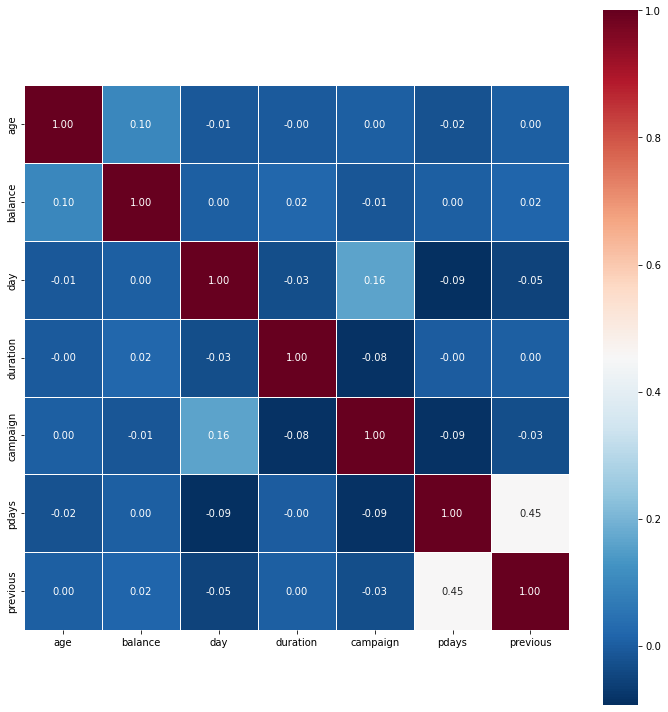

In [9]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(df._get_numeric_data().astype(float).corr(),
            square=True, cmap='RdBu_r', linewidths=.5,
            annot=True, fmt='.2f').figure.tight_layout()
plt.show()

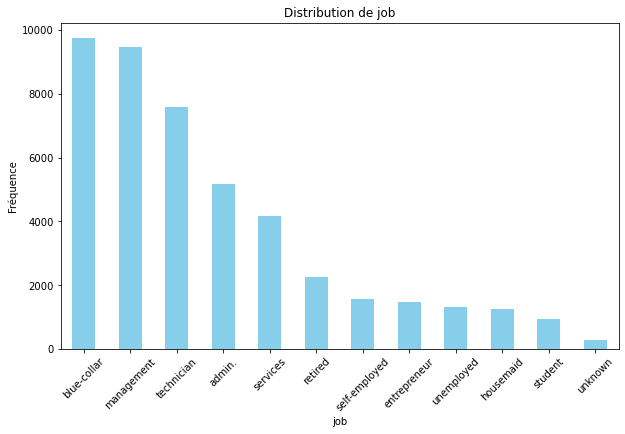

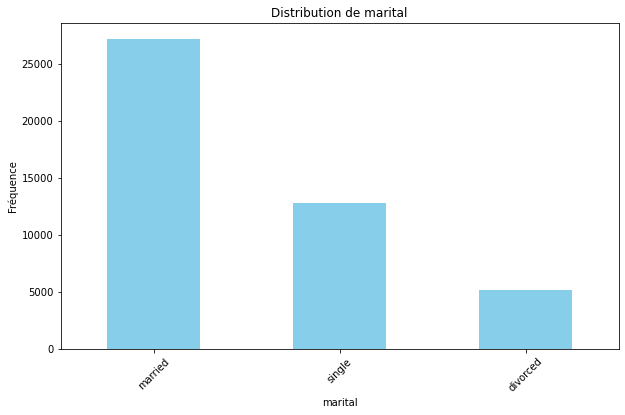

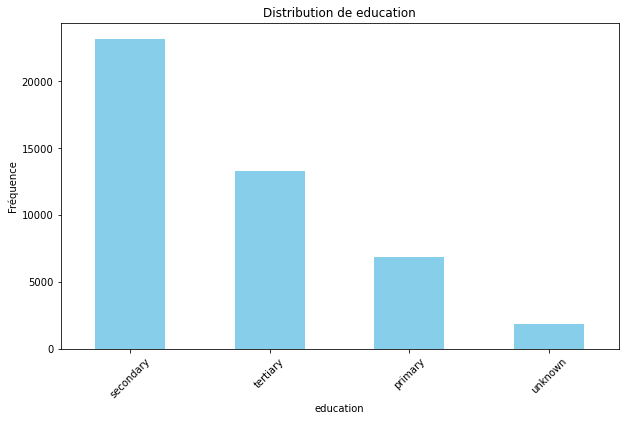

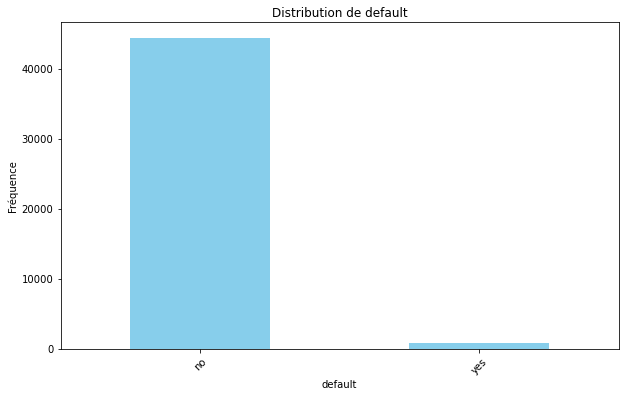

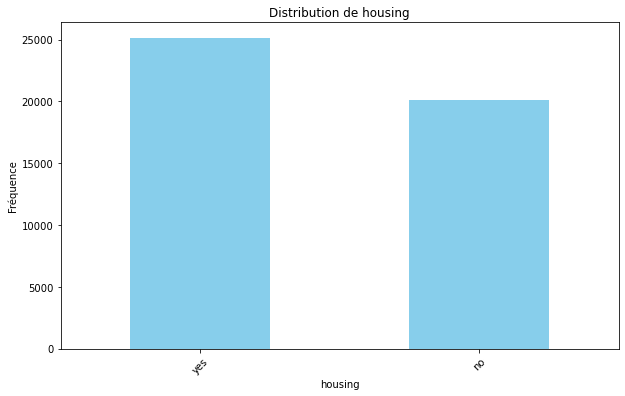

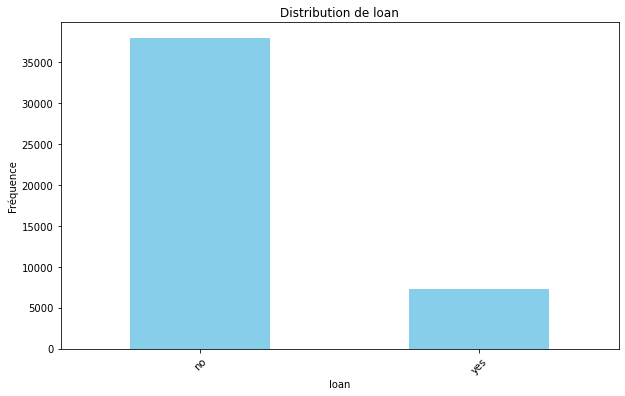

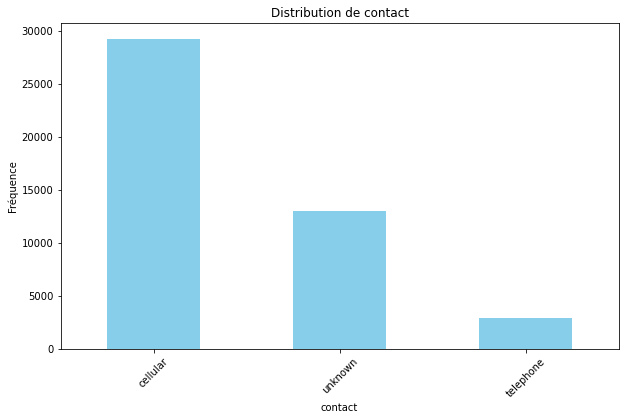

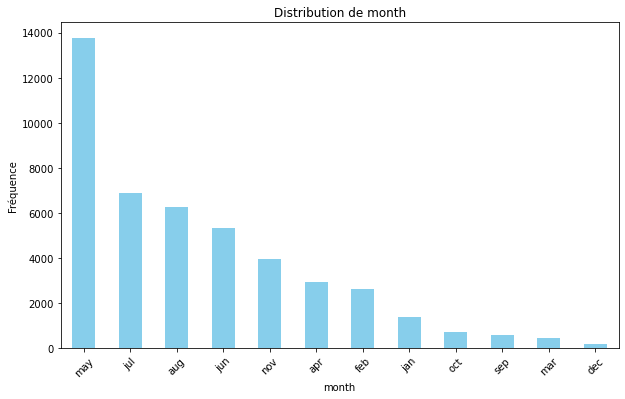

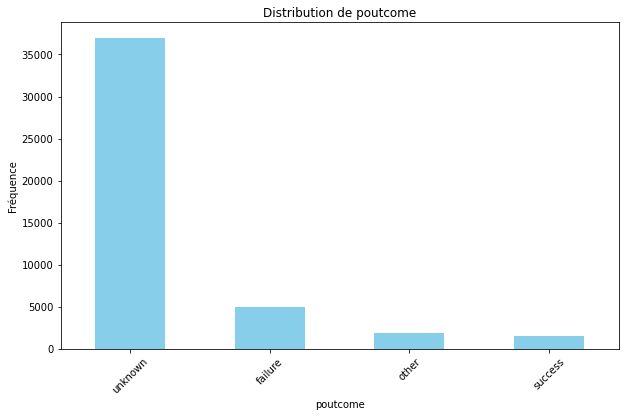

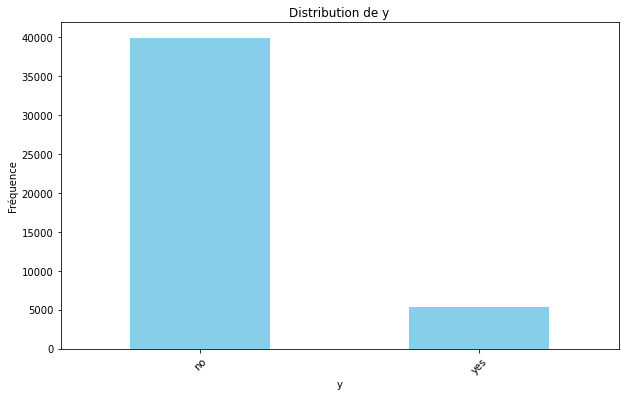

In [11]:
import matplotlib.pyplot as plt

# Sélectionner les caractéristiques catégorielles
category_features = df.select_dtypes(include=['object', 'bool']).columns.values

# Parcourir chaque caractéristique catégorielle et tracer un diagramme en barres
for col in category_features:
    # Compter les occurrences de chaque catégorie
    category_counts = df[col].value_counts()
    
    # Tracer un diagramme en barres
    plt.figure(figsize=(10, 6))  # Définir la taille de la figure
    category_counts.plot(kind='bar', color='skyblue')  # Tracer un diagramme en barres
    plt.title(f'Distribution de {col}')  # Titre du graphique
    plt.xlabel(col)  # Étiquette de l'axe des x
    plt.ylabel('Fréquence')  # Étiquette de l'axe des y
    plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
    plt.show()  # Afficher le graphique


In [18]:
for col in category_features:
    print(f"{col} \n{20 * '-'}")    
    print(df[col].value_counts(), "\n")
    
print(df.nunique(axis=1))

job 
--------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital 
--------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education 
--------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default 
--------------------
no     44396
yes      815
Name: default, dtype: int64 

housing 
--------------------
yes    25130
no     20081
Name: housing, dtype: int64 

loan 
--------------------
no     37967
yes     7244
Name: loan, dtype: int64 

contact 
--------------------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

month 
--------------------
may    13766
jul     6895
aug    

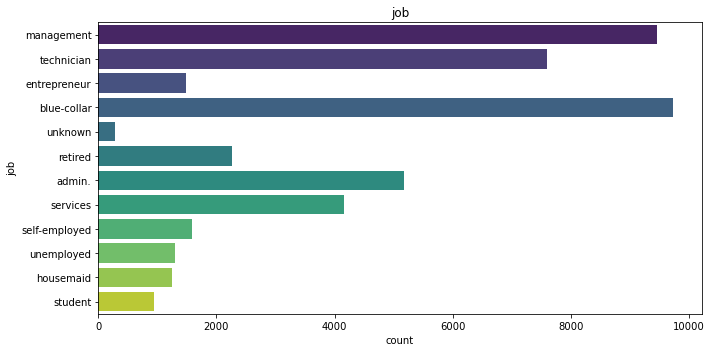

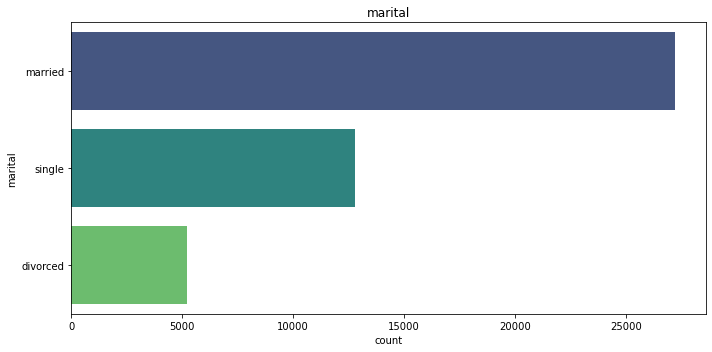

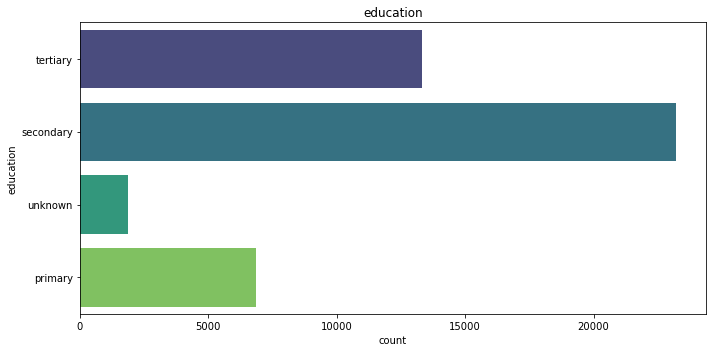

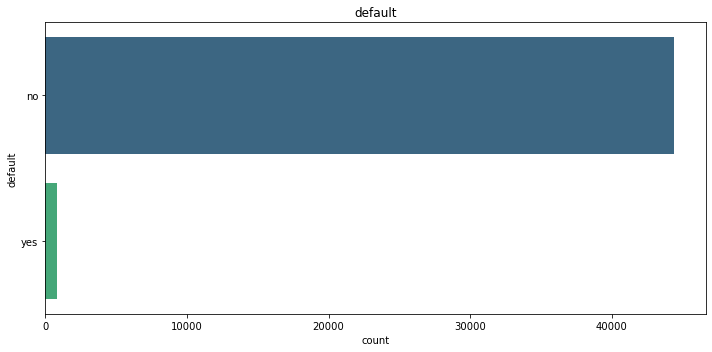

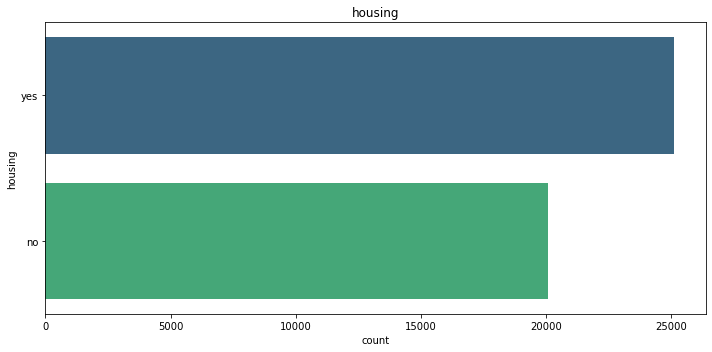

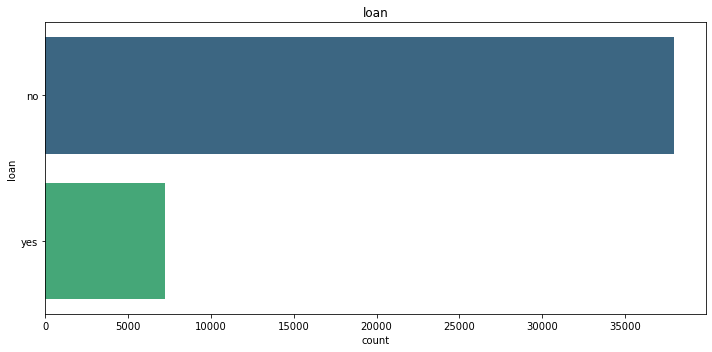

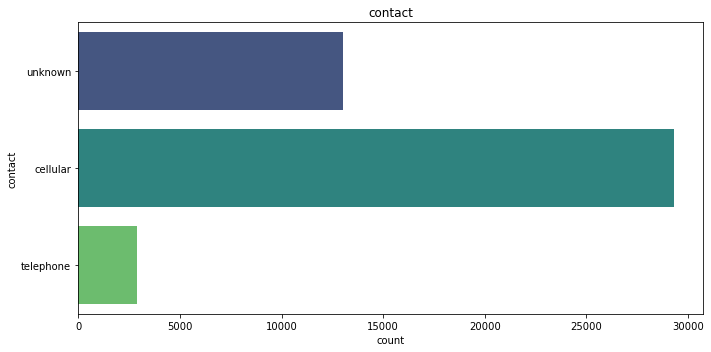

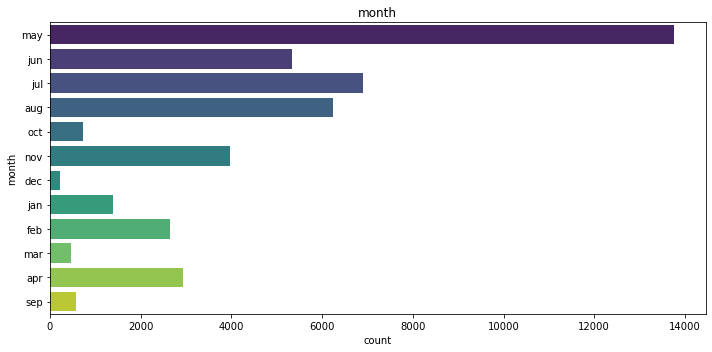

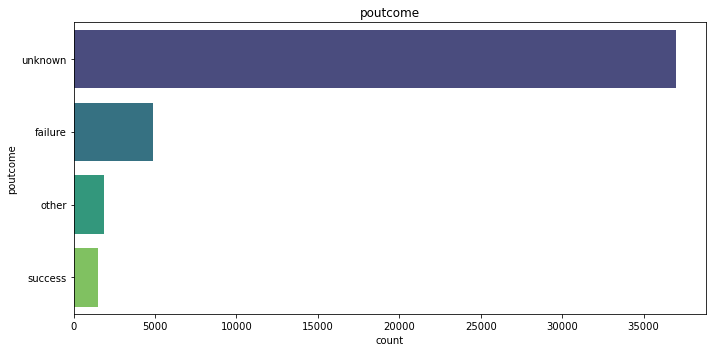

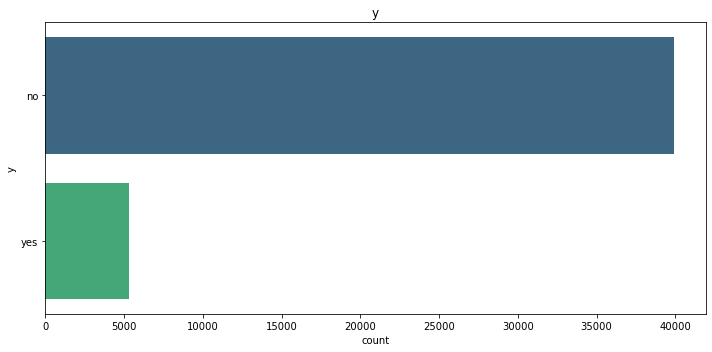

In [12]:
for col in category_features:
    plt.figure(figsize=(10,5))
    sns.countplot(y=col, data=df, palette='viridis')
    plt.title(col)
    plt.tight_layout()
    plt.show()


Text(0, 0.5, 'Frequency of Purchase')

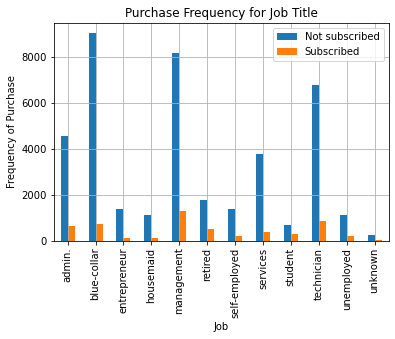

In [14]:
table = pd.crosstab(df.job, df.y)
table.columns = ['Not subscribed', 'Subscribed']
table.plot(kind='bar')

plt.grid(True)

plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')



In [15]:
table = pd.crosstab(df.job, df.y)
table = round(table.div(table.sum(axis=1), axis=0).mul(100), 2)
table.columns=['notsubcribed', 'subcribed']
table.sort_values(by=['subcribed'], ascending=False).loc[:, 'subcribed']

job
student          28.68
retired          22.79
unemployed       15.50
management       13.76
admin.           12.20
self-employed    11.84
unknown          11.81
technician       11.06
services          8.88
housemaid         8.79
entrepreneur      8.27
blue-collar       7.27
Name: subcribed, dtype: float64

Text(0, 0.5, 'Proportion of Customers')

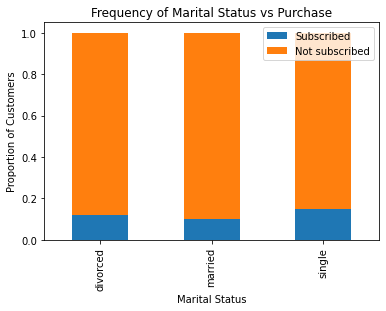

In [16]:
table = pd.crosstab(df.marital,df.y)
table = table.div(table.sum(1).astype(float), axis=0)
table.columns = ['Not subscribed', 'Subscribed']
# Ordering stacked bars and plot the chart
table[['Subscribed', 'Not subscribed']].plot(kind='bar', stacked=True)
plt.title('Frequency of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

In [17]:
# load X and y
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (36168, 16)
Number transactions y_train dataset:  (36168,)
Number transactions X_test dataset:  (9043, 16)
Number transactions y_test dataset:  (9043,)


In [18]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.values
numeric_features = numeric_features[numeric_features != 'y']

category_features = X_train.select_dtypes(include=['object', 'bool']).columns.values

print(numeric_features)
print(category_features)

['age' 'balance' 'day' 'duration' 'campaign' 'pdays' 'previous']
['job' 'marital' 'education' 'default' 'housing' 'loan' 'contact' 'month'
 'poutcome']


In [19]:
def dummify(ohe, x, columns):
    transformed_array = ohe.transform(x)

    # Obtenez la liste des noms de colonnes catégorielles
    enc = ohe.named_transformers_['cat'].named_steps['onehot']
    feature_lst = enc.get_feature_names_out(columns)
    
    cat_colnames = feature_lst.tolist()
    all_colnames = numeric_features + cat_colnames 
    
    # Convertir le tableau numpy en dataframe
    df = pd.DataFrame(transformed_array, index=x.index, columns=all_colnames)
    
    return transformed_array, df

numeric_features = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
category_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Définir les transformers pour les données numériques et catégorielles
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Appliquer les transformers à toutes les colonnes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, category_features)])

# Adapter le préprocesseur et transformer les données d'entraînement
ohe = preprocessor.fit(X_train)
X_train_t_array, X_train_t = dummify(ohe, X_train, category_features)
X_test_t_array, X_test_t = dummify(ohe, X_test, category_features)

# Afficher les premières lignes du DataFrame transformé
print(X_train_t.head())

# Obtenez les noms de colonnes des données transformées
X_train_columns = X_train_t.columns
print(X_train_columns)


            age   balance       day  campaign     pdays  previous  job_admin.  \
13932  1.515061 -0.231637 -0.698514 -0.567836 -0.410222 -0.241405         1.0   
9894  -0.369597  0.106038 -0.818717 -0.567836 -0.410222 -0.241405         0.0   
39946 -0.558063  0.470635 -1.660136  0.402837  0.560728  0.585721         0.0   
9217  -0.558063 -0.375660 -1.299528 -0.567836 -0.410222 -0.241405         1.0   
4124  -0.275365 -0.340303  0.383311 -0.567836 -0.410222 -0.241405         0.0   

       job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
13932              0.0               0.0            0.0  ...        0.0   
9894               0.0               0.0            0.0  ...        1.0   
39946              0.0               0.0            0.0  ...        1.0   
9217               0.0               0.0            0.0  ...        1.0   
4124               0.0               0.0            0.0  ...        0.0   

       month_mar  month_may  month_nov  month_oct  month_sep  

In [25]:
!pip install imbalanced-learn


  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [26]:
from imblearn.over_sampling import SMOTE

# summarize class distribution
counter = Counter(y_train)
print(counter)

# transform the dataset
oversample = SMOTE()
X_train_smote, y_train = oversample.fit_resample(X_train_t, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({'no': 31942, 'yes': 4226})
Counter({'yes': 31942, 'no': 31942})


In [27]:
# Créer un DataFrame final pour les caractéristiques et les étiquettes de formation
final_X_train = pd.DataFrame(data=X_train_smote, columns=X_train_columns)
final_y_train = pd.DataFrame(data=y_train, columns=['y'])

# Initialiser le modèle RFE avec un modèle de régression logistique
rfe_model = RFE(LogisticRegression(solver='lbfgs', max_iter=1000), n_features_to_select=25)

# Ajuster le modèle RFE aux données
rfe_model = rfe_model.fit(final_X_train, final_y_train.values.ravel())

# Sélection des fonctionnalités
print(rfe_model.support_)
print(rfe_model.ranking_)


[False False False  True False False False False  True  True False  True
 False False False False False  True False False  True False False False
 False False  True  True False False  True  True False  True False  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True]
[16 15 17  1 22 19 13 24  1  1 20  1 26 18  2 21 11  1 23  9  1  5 14 12
  4  7  1  1  6  3  1  1 10  1 25  1  1  1  1  1  8  1  1  1  1  1  1  1
  1  1]


In [28]:
selected_columns = X_train_columns[rfe_model.support_]
print(selected_columns.tolist())

['campaign', 'job_entrepreneur', 'job_housemaid', 'job_retired', 'job_unknown', 'marital_single', 'default_yes', 'housing_no', 'loan_yes', 'contact_cellular', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


In [29]:
X_train_final = final_X_train[selected_columns.tolist()]
y_train_final = final_y_train['y']
X_test_final = X_test_t[selected_columns.tolist()]
y_test_final = y_test

X_test_final.head()

,campaign,job_entrepreneur,job_housemaid,job_retired,job_unknown,marital_single,default_yes,housing_no,loan_yes,contact_cellular,...,month_jul,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
14001,3.961971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32046,-0.567836,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13318,0.726394,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
42991,1.373510,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14237,-0.244279,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train_final, y_train_final)

LogisticRegression()

In [32]:
y_pred = logreg.predict(X_test_final)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_final, y_test_final)))

Accuracy of logistic regression classifier on test set: 0.74
